## Sales of cigarette packs per capita in different states per year from 2013 to 2019


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
sales_DATA = pd.read_csv("data/U.S._Chronic_Disease_Indicators__Tobacco.csv", low_memory=False)

Initially, we need to filter out the rows we need to analyze our research hypothesis

In [4]:
states_sales = sales_DATA[sales_DATA["Question"] == "Sale of cigarette packs"]


After filtering out the rows we need, we clean up the dataframe and only save the columns we need for analysis

In [5]:
states_sales = states_sales[['YearStart', 'LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit', 'DataValue']]
states_sales = states_sales.groupby(['YearStart', 'LocationDesc']).sum().reset_index()

In this part, we figured out that there are four states are not actual states, respectively GU, PR, US, VI. These four states also do not have actual value for the sales per capita. Hence, we decided to filter out these four states in our analysis. There are 51 states left for the graph.

In [7]:
states_sales = states_sales.loc[states_sales['DataValue'] != 0.0]
len(states_sales.LocationAbbr.unique())

51

In order to analyze the changing trend of sales of cigarettes in each state from 2013 to 2019, we decide to plot them as lines in a plot to observe the trend. Initially, we create a data frame with the columns from original data that we need to plot the line chart. 

In [9]:
df=states_sales[['YearStart', 'LocationAbbr','DataValue']]

After create the dataframe, we observe that the data type of the column "DataValue" (the value we need to plot on y-axis) is in object type instead of number type. If the value is in object type, it cannot be arranged in either ascending or descending order. So we need to change it into float and create a new data frame based on the previous one. 

In [ ]:
df_flt = df.astype({'DataValue':'float'})

The next step is to plot the lines. We use for loop function to plot a line chart with 51 lines. 

Text(0, 0.5, 'sales per capita')

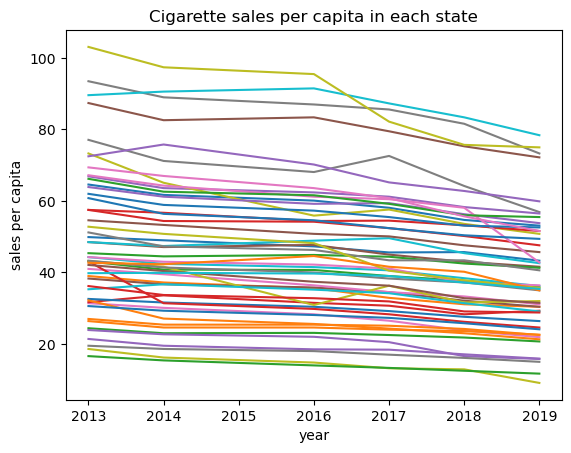

In [10]:
for i in states:
    plt.plot(np.array(df_flt[df_flt['LocationAbbr'] ==i]['YearStart']), np.array(df_flt[df_flt['LocationAbbr'] == i]['DataValue']))
plt.title('Cigarette sales per capita in each state')
plt.xlabel('year')
plt.ylabel('sales per capita')

From the chart, we can clearly see that the trend of cigarette sales per capita in most of states is in a gradually decreasing trend. There are also a few states experienced fluctuations in the sales but the general trend is still in a decreasing way. 